In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

import os, glob
import cPickle as pickle

Populating the interactive namespace from numpy and matplotlib


In [10]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
from util import Util
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

In [19]:
import skimage.draw

In [265]:
DELTA_MIN = 20
DELTA_MAX = 80
SIZE = (100, 100)
    
def curvature(flags=[False,False,False]):

    var_y = flags[0]
    var_x = flags[1]
    var_width = flags[2]

    sparse = None
    img = None
    label = None
    parameters = 1

    DOF = 80
    DEPTH = np.random.randint(1, DOF+1)
    DEPTH = 80
    parameters *= DOF

    Y_RANGE = (DELTA_MAX-20, DELTA_MAX)
    X_RANGE = (0, DELTA_MIN*2)

    X = DELTA_MIN
    if var_x:
      X, p = Util.parameter(X_RANGE[0], X_RANGE[1])
      parameters *= p

    Y = DELTA_MAX
    if var_y:
      Y, p = Util.parameter(Y_RANGE[0], Y_RANGE[1])
      parameters *= p

    WIDTH = 60
    if var_width:
      WIDTH, p = Util.parameter(20, 60)
      parameters *= p

    start = (Y, X)
    mid = (DEPTH, X+WIDTH/2)
    end = (Y, X+WIDTH)

    img = np.zeros(SIZE, dtype=np.bool)

    rr, cc = skimage.draw.bezier_curve(start[0], start[1], mid[0], mid[1], end[0], end[1], 1)
    img[rr, cc] = 1
    t = 0.5

    P10 = (mid[0] - start[0], mid[1] - start[1])
    P21 = (end[0] - mid[0], end[1] - mid[1])
    dBt_x = 2*(1-t)*P10[1] + 2*t*P21[1]
    dBt_y = 2*(1-t)*P10[0] + 2*t*P21[0]
    dBt2_x = 2*(end[1] - 2*mid[1] + start[1])
    dBt2_y = 2*(end[0] - 2*mid[0] + start[0])
    curvature = np.abs((dBt_x*dBt2_y - dBt_y*dBt2_x) / ((dBt_x**2 + dBt_y**2)**(3/2.)))

    sparse = [Y, X, DEPTH, WIDTH]

    label = curvature

    return sparse, img, label, parameters


In [32]:
sparse, img, label, parameters = curvature([True, True, True])

[68, 32, 68, 60]
0.0


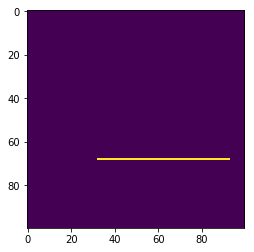

In [256]:
sparse, img, label, parameters = curvature([True, True, False])
imshow(img)
print sparse
print label

[69, 4, 80, 60]
0.0122222222222


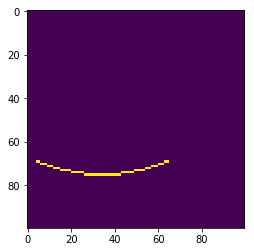

In [266]:
sparse, img, label, parameters = curvature([True, True, False])
imshow(img)
print sparse
print label